# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [1]:
from sklearn import tree

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [2]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [4]:
print(clf.predict([[0, 1, 1]]))

[0]


In [5]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


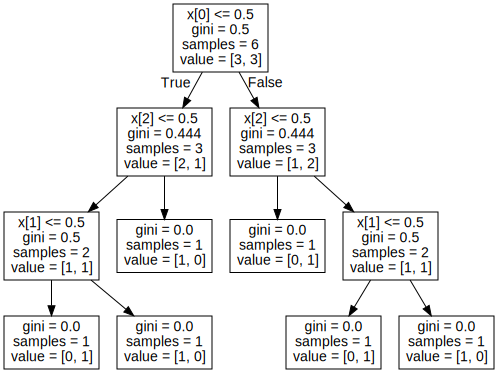

In [6]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [8]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [9]:
# Generate a random permutation of the indices of examples that will be later used
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [10]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [11]:
# apply fitted model "clf" to the test set
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test)
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [12]:
# print the corresponding instances indexes and class names
for i in range(len(iris_y_test)):
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [13]:
for i in range(len(iris_y_test)):
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 70: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # 87: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 36: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 21: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # 9: 
sepal length (cm)=4.9, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.1
Predicted: setosa	 True: setosa

Instance # 103: 
sepal length (cm)=6.3, sepal width (cm)=2.9, petal length (cm)=5.6, petal width (cm)=1.8
Predicted: virginica	 True: virginica

Insta

Usa Pandas per visualizzare gli stessi dati in modo più compatto

In [14]:
import pandas as pd
results_data = []

for i in range(len(iris_y_test)):
    feature_values = [iris_X_test[i][j] for j in range(len(iris.feature_names))]

    results_data.append({
        'Instance #': indices_test[i],
        iris.feature_names[0]: feature_values[0],
        iris.feature_names[1]: feature_values[1],
        iris.feature_names[2]: feature_values[2],
        iris.feature_names[3]: feature_values[3],
        'Predicted': iris.target_names[predicted_y_test[i]],
        'True Class': iris.target_names[iris_y_test[i]],
        'Correct': 'Yes' if predicted_y_test[i] == iris_y_test[i] else 'No'
    })

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False, float_format='%.1f'))

 Instance #  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  Predicted True Class Correct
         88                5.6               3.0                4.1               1.3 versicolor versicolor     Yes
         70                5.9               3.2                4.8               1.8  virginica versicolor      No
         87                6.3               2.3                4.4               1.3 versicolor versicolor     Yes
         36                5.5               3.5                1.3               0.2     setosa     setosa     Yes
         21                5.1               3.7                1.5               0.4     setosa     setosa     Yes
          9                4.9               3.1                1.5               0.1     setosa     setosa     Yes
        103                6.3               2.9                5.6               1.8  virginica  virginica     Yes
         67                5.8               2.7                4.1     

# Obtain model performance results

In [15]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [17]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree

## 1. Print the picture in a PDF file

In [18]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [19]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


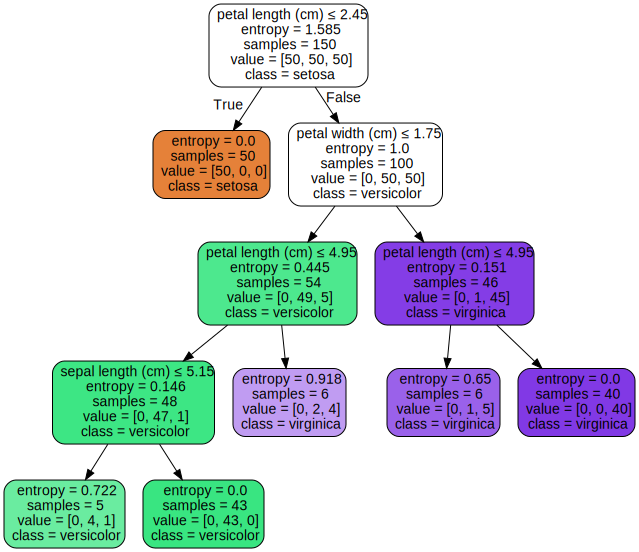

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. build and show the confusion matrix obtained by cross validation, where the errors are on the test sets.
2. build the ROC curve (or coverage curve in coverage space) and plot it for the tree: you have to build three curves, one for each class, considered in turn as the positive class.
3. get an artificial inflation of the Virginica class in the training set by a given factor: 10 (weigh more the class virginica which is difficult to discriminate with versicolor). Learn the tree in this condition. In this case we have more examples in the dataset!

**Note:** Be careful in the random sampling when you divide the dataset into training- and test-set: no examples of the training-set should go in the test- set.

4. As an alternative to step 3, modify instead the weight of the Virginica class (set to 10 the weight for misclassification of Virginica) and learn the tree in this condition. You should obtain similar results as for step 3.

**Note:** Be careful to the values of the iperparameters you use if you want to obtain the same results as with the step 3 (such as min_samples_split, min_samples_leaf, max_leaf_nodes): they should be set in a value that is proportionated to the number of examples in the training-set.

5. learn the tree but try to avoid overfitting (by improving the error on the test set). You can do tuning of the hyper-parameters using the function [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
Consider the following iperprameters:
* criterion{“gini”, “entropy”, “log_loss”}
* splitter{“best”, “random”}
* max_depth
* min_samples_split
* min_samples_leaf
* max_features
* max_leaf_nodes
* min_impurity_decrease
* ccp_alpha

Decide yourself the suitable possible values for each of them.



# 1. build and show the confusion matrix obtained by cross validation, where the errors are on the test sets.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.4)
  from scipy.sparse import csr_matrix, issparse


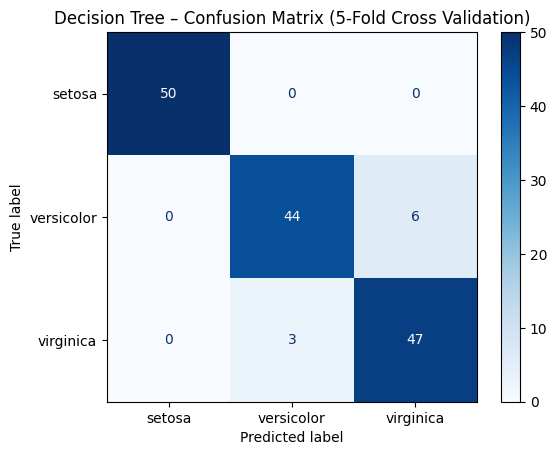

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Carico dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Definisco il classificatore
clf = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=300,
    min_samples_leaf=5,
    class_weight={0:1, 1:1, 2:1}
)

# 3. Predizioni ottenute tramite cross-validation (5-fold)
#    Ogni campione è predetto SOLO nel fold in cui è test
y_pred = cross_val_predict(clf, X, y, cv=5)

# 4. Confusion matrix sui test set aggregati
cm = confusion_matrix(y, y_pred)

# 5. Visualizzazione
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=iris.target_names
)

disp.plot(cmap="Blues")
plt.title("Decision Tree – Confusion Matrix (5-Fold Cross Validation)")
plt.show()

# 2. build the ROC curve (or coverage curve in coverage space) and plot it for the tree: you have to build three curves, one for each class, considered in turn as the positive class.


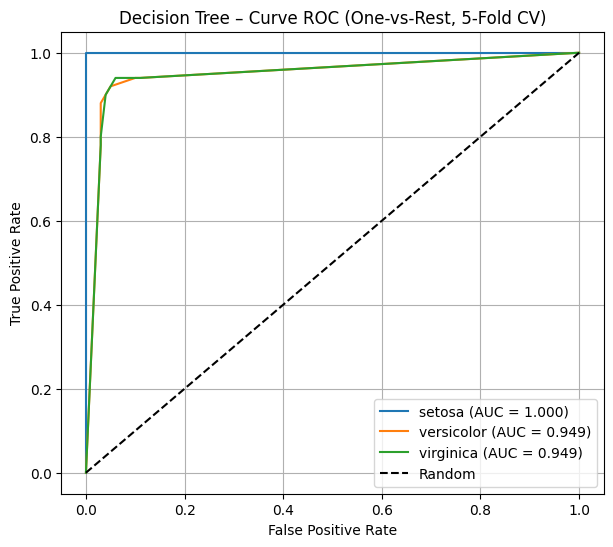

In [3]:
"""
Considerazioni immediate:
 - il problema è multiclasse (3 classi)
 - la ROC è binaria, quindi va usata la strategia one-vs-rest (OvR)
3 ROC curve:
 - setosa vs (Versicolor + Virginica)
 - Versicolor vs (Setosa + Virginica)
 - Virginica vs (Setosa + Versicolor)
"""
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# =========================
# 1) Carico il dataset Iris
# =========================
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
n_classes = len(class_names)

# =========================
# 2) Definisco il classificatore
# =========================
clf = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=300,
    min_samples_leaf=5
)

# ==========================================
# 3) Ottengo le probabilità via cross-validation
# ==========================================
# cross_val_predict con method="predict_proba" mi restituisce:
# - per ogni esempio, le probabilità predette per ciascuna classe
# - IMPORTANTISSIMO: ogni probabilità è calcolata solo quando quell’esempio è nel test fold,
#   quindi sto valutando davvero la capacità di generalizzazione (errori sui test set).
#
# y_score avrà shape (n_samples, n_classes) = (150, 3)
y_score = cross_val_predict(
    clf,
    X,
    y,
    cv=5,
    method="predict_proba"
)

# =====================================
# 4) Binarizzo le etichette (One-vs-Rest)
# =====================================
# Per costruire la ROC per la classe i:
# - considero y_bin[:, i] come "verità" binaria (1 se appartiene alla classe i, 0 altrimenti)
# - considero y_score[:, i] come punteggio/probabilità della classe i
#
# y_bin avrà shape (n_samples, n_classes) = (150, 3)
y_bin = label_binarize(y, classes=[0, 1, 2])

# =========================
# 5) Calcolo e plotto le ROC
# =========================
plt.figure(figsize=(7, 6))

for i in range(n_classes):
    # Calcolo FPR e TPR per la classe i trattata come positiva
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])

    # Calcolo l'area sotto la curva (AUC) per quantificare la bontà della separazione
    roc_auc = auc(fpr, tpr)

    # Disegno la curva ROC della classe i
    plt.plot(
        fpr,
        tpr,
        label=f"{class_names[i]} (AUC = {roc_auc:.3f})"
    )

plt.plot([0, 1], [0, 1], "k--", label="Random")

# Etichette e dettagli del grafico
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree – Curve ROC (One-vs-Rest, 5-Fold CV)")
plt.legend()
plt.grid(True)
plt.show()

# 3. get an artificial inflation of the Virginica class in the training set by a given factor: 10 (weigh more the class virginica which is difficult to discriminate with versicolor). Learn the tree in this condition. In this case we have more examples in the dataset!

Esempi training originali: 105
Esempi training dopo inflazione: 455


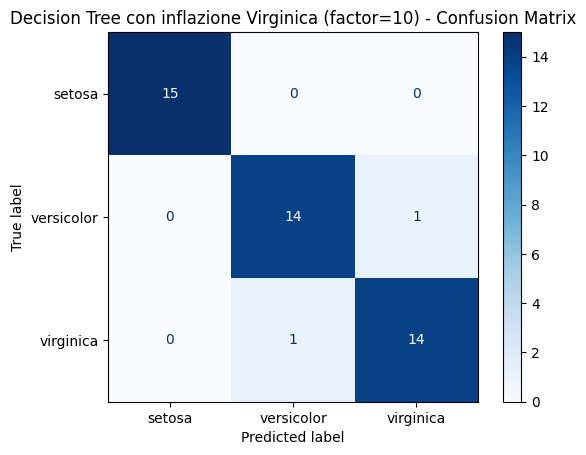

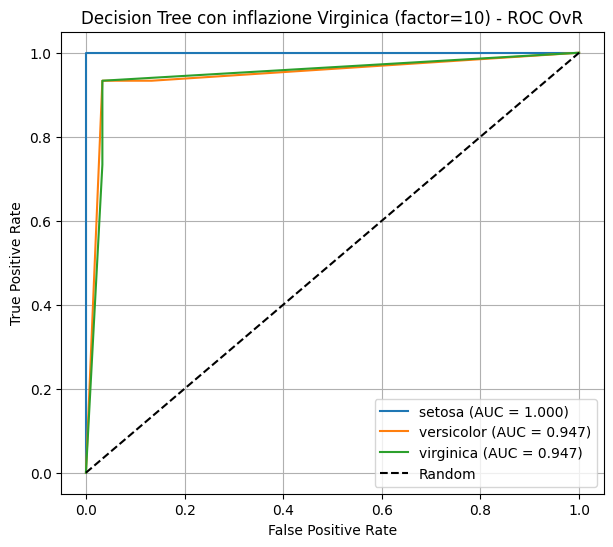

In [4]:
# Obiettivo:
# - La classe Virginica è quella che tende a confondersi con Versicolor.
# - Per "pesarla di più" durante l'apprendimento, creo un training set in cui
#   gli esempi Virginica sono artificialmente aumentati (oversampling) di un fattore 10.
#
# Nota:
# - In alternativa avrei potuto usare class_weight (es: {2:10}).

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# =========================
# 1) Carico il dataset Iris
# =========================
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# =========================
# 2) Split train/test
# =========================
# Uso stratify=y per mantenere la proporzione delle classi nel train e nel test, dato che altererò il dataset di training
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# =======================================================
# 3) Oversampling: "inflazione" artificiale della Virginica
# =======================================================
# Definisco:
# - virginica_label = 2 (nel dataset Iris: 0=setosa, 1=versicolor, 2=virginica)
# - factor = 10 (voglio moltiplicare i campioni Virginica nel training per 10)
virginica_label = 2
factor = 10

# Seleziono gli indici dei campioni Virginica nel training set
idx_virginica = np.where(y_train == virginica_label)[0]

# Estraggo i campioni Virginica
X_vir = X_train[idx_virginica]
y_vir = y_train[idx_virginica]

# Creo copie ripetute dei campioni Virginica.
# Esempio: se ho 35 Virginica nel training, con factor=10 avrò ~350 Virginica "viste" dal modello.
X_vir_inflated = np.repeat(X_vir, repeats=factor, axis=0)
y_vir_inflated = np.repeat(y_vir, repeats=factor, axis=0)

# Creo il nuovo training set "aumentato":
# - tengo TUTTI i campioni originali
# - aggiungo le copie Virginica
X_train_inflated = np.vstack([X_train, X_vir_inflated])
y_train_inflated = np.concatenate([y_train, y_vir_inflated])

print("Esempi training originali:", len(X_train))
print("Esempi training dopo inflazione:", len(X_train_inflated))

# =========================
# 4) Addestro il Decision Tree
# =========================
# Ri-addestro lo stesso albero, ma ora su un training set con molte più Virginica.
# Questo dovrebbe spingere l’albero a "prestare più attenzione" a separare Virginica da Versicolor.
clf_inflated = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=300,
    min_samples_leaf=5
)
clf_inflated.fit(X_train_inflated, y_train_inflated)

# =========================
# 5) Valutazione sul test set (NON alterato)
# =========================
# Predizione di classe
y_pred = clf_inflated.predict(X_test)

# Probabilità (servono per ROC in modalità one-vs-rest)
y_proba = clf_inflated.predict_proba(X_test)

# =========================
# 6) Confusion Matrix
# =========================
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=class_names,
    cmap="Blues"
)
plt.title("Decision Tree con inflazione Virginica (factor=10) - Confusion Matrix")
plt.show()

# =========================
# 7) ROC curve one-vs-rest (3 curve: una per classe)
# =========================
# Per la ROC multiclasse, considero ogni classe come positiva a turno.
# In test set ho y_test con etichette 0/1/2.
# Per ogni classe i:
# - y_true_bin = 1 se y_test == i, altrimenti 0
# - y_score = probabilità predetta di classe i (colonna i di predict_proba)
plt.figure(figsize=(7, 6))

for i, name in enumerate(class_names):
    y_true_bin = (y_test == i).astype(int)  # binarizzo la verità
    y_score = y_proba[:, i]  # punteggio = prob classe i

    fpr, tpr, _ = roc_curve(y_true_bin, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree con inflazione Virginica (factor=10) - ROC OvR")
plt.legend()
plt.grid(True)
plt.show()


# 4. As an alternative to step 3, modify instead the weight of the Virginica class (set to 10 the weight for misclassification of Virginica) and learn the tree in this condition. You should obtain similar results as for step 3.

Numero esempi nel training set: 105
min_samples_leaf scelto: 21
min_samples_split scelto: 26


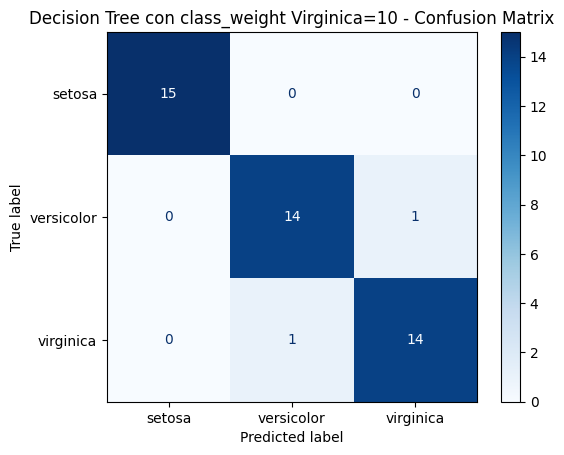

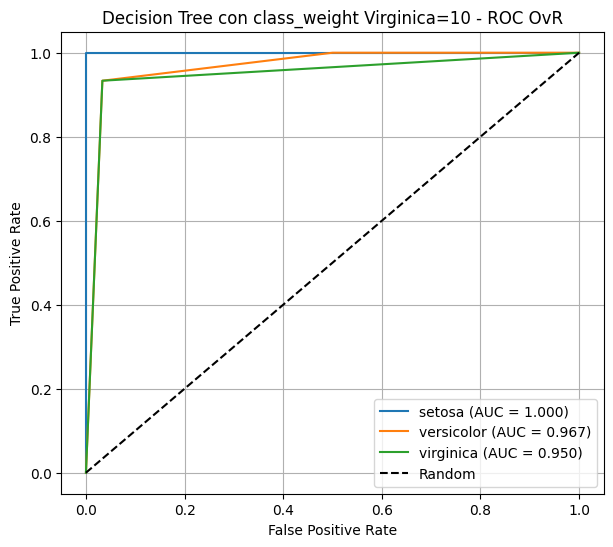

In [8]:
# 4) Alternativa all’oversampling (step 3): aumento del peso della classe Virginica
#
# Obiettivo:
# - Invece di creare artificialmente più esempi Virginica (oversampling),
#   aumento il "costo" degli errori sulla classe Virginica.
# - In altre parole: sbagliare Virginica deve pesare molto di più rispetto alle altre classi.
#
# Come lo faccio in scikit-learn:
# - uso class_weight nel DecisionTreeClassifier
#   esempio: class_weight = {0:1, 1:1, 2:10}
#
# Interpretazione:
# - durante la costruzione dell’albero, impurità (entropy/gini) e scelta degli split
#   tengono conto dei pesi: l’albero è incentivato a separare meglio la classe con peso alto.
#
#
# Nota sugli iperparametri:
# - Nel caso oversampling avevo un training-set più grande → parametri come min_samples_leaf
#   risultano "più permissivi" perché il dataset è più grande.
# - Qui invece il numero di esempi resta quello originale (es. 105).
# - Per ottenere risultati davvero simili allo step 3, devo scegliere iperparametri
#   coerenti con la dimensione del training-set.
# - Una strategia semplice è usare min_samples_leaf come FRAZIONE del training:
#     min_samples_leaf ≈ max(5, round(0.05 * n_train))

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# =========================
# 1) Carico il dataset Iris
# =========================
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# =========================
# 2) Split train/test
# =========================
# Mantengo stratify=y per avere 15 esempi per classe nel test (con test_size=0.30).
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

n_train = len(X_train)
print("Numero esempi nel training set:", n_train)

# ============================================================
# 3) Scelta iperparametri coerenti con dimensione training set
# ============================================================
# Qui applico una scelta "proporzionata":
# - se voglio che l’albero non crei foglie troppo piccole,
#   imposto min_samples_leaf come una frazione del training set.
#
# Nota durante l'esercizio: aumentando i valori ho notato che la ROC si avvicinava sempre di più alla ROC dei dati con oversampling
min_leaf = max(5, int(round(0.05 * n_train)))  # esempio: 5% del training (minimo 5)
min_split = max(10, int(round(0.10 * n_train)))  # esempio: 10% del training (minimo 10)

print("min_samples_leaf scelto:", min_leaf)
print("min_samples_split scelto:", min_split)

# ============================================================
# 4) Definisco l’albero con class_weight che enfatizza Virginica
# ============================================================
# Virginica è la classe 2 → le do peso 10.
# Questo significa che un errore su Virginica è "10 volte più costoso".
clf_weighted = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=300,
    class_weight={0: 1, 1: 1, 2: 10},
    min_samples_leaf=min_leaf,
    min_samples_split=min_split
)

# Addestro il modello
clf_weighted.fit(X_train, y_train)

# =========================
# 5) Predizione sul test set
# =========================
y_pred = clf_weighted.predict(X_test)
y_proba = clf_weighted.predict_proba(X_test)

# =========================
# 6) Confusion Matrix
# =========================
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=class_names,
    cmap="Blues"
)
plt.title("Decision Tree con class_weight Virginica=10 - Confusion Matrix")
plt.show()

# =========================
# 7) ROC curve One-vs-Rest (3 curve)
# =========================
plt.figure(figsize=(7, 6))

for i, name in enumerate(class_names):
    # Binarizzo: classe i positiva, tutte le altre negative
    y_true_bin = (y_test == i).astype(int)
    y_score = y_proba[:, i]  # probabilità predetta per la classe i

    fpr, tpr, _ = roc_curve(y_true_bin, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree con class_weight Virginica=10 - ROC OvR")
plt.legend()
plt.grid(True)
plt.show()


# 5. learn the tree but try to avoid overfitting (by improving the error on the test set). You can do tuning of the hyper-parameters using the function [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.4)
  from scipy.sparse import csr_matrix, issparse
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.4)
  from scipy.sparse import csr_matrix, issparse
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.4)
  from scipy.sparse import csr_matrix, issparse
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2

Miglior score CV (f1_macro): 0.9704273504273505
Migliori iperparametri trovati:
{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}

Accuracy su test: 0.9111111111111111

Classification report su test:
              precision    recall  f1-score   support

      setosa       0.88      1.00      0.94        15
  versicolor       0.92      0.80      0.86        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



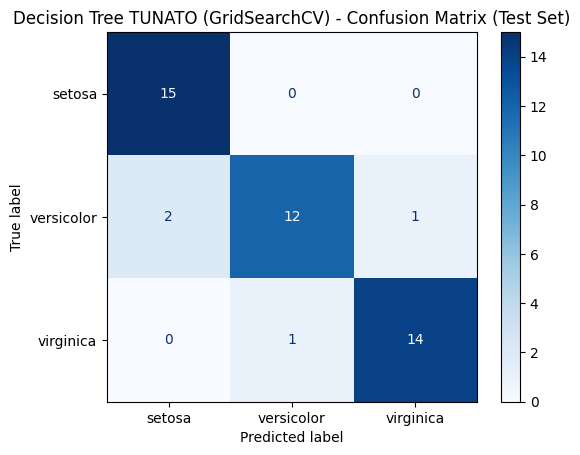

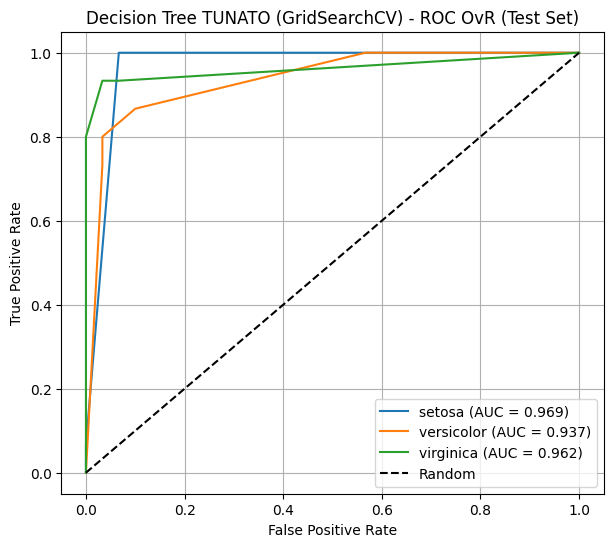

In [9]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report,
    ConfusionMatrixDisplay,
    roc_curve, auc
)


# =========================
# 1) Carico il dataset Iris
# =========================
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
n_classes = len(class_names)

# =========================
# 2) Split train/test
# =========================
# Mantengo stratify=y per mantenere la distribuzione delle classi anche nel test set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# ==========================================================
# 3) Definisco la griglia di iperparametri da provare
# ==========================================================
# Scelgo valori ragionevoli per Iris (dataset piccolo).
# - max_depth: limito la profondità per ridurre overfitting
# - min_samples_split / leaf: evito foglie troppo piccole
# - max_features: riduco la libertà di split
# - max_leaf_nodes: limito numero foglie
# - min_impurity_decrease: split solo se migliorano davvero
# - ccp_alpha: pruning (taglia rami inutili)
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [None, 2, 3, 4, 5],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_features": [None, "sqrt", "log2"],
    "max_leaf_nodes": [None, 3, 5, 7, 10, 15],
    "min_impurity_decrease": [0.0, 0.001, 0.01],
    "ccp_alpha": [0.0, 0.001, 0.01, 0.05]
}

# ==========================================================
# 4) Imposto GridSearchCV
# ==========================================================
# - estimator: DecisionTree base (random_state fisso)
# - cv=5: 5-fold cross-validation
# - scoring: posso usare "accuracy" oppure "f1_macro"
#   * f1_macro è spesso più "giusto" in multiclass perché media le classi
# - n_jobs=-1: usa tutti i core disponibili (più veloce)
# - refit=True: alla fine rifitta automaticamente il migliore su TUTTO il training
base_tree = DecisionTreeClassifier(random_state=300)

grid = GridSearchCV(
    estimator=base_tree,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    refit=True
)

# ==========================================================
# 5) Eseguo la ricerca (solo sul training set)
# ==========================================================
grid.fit(X_train, y_train)

print("Miglior score CV (f1_macro):", grid.best_score_)
print("Migliori iperparametri trovati:")
print(grid.best_params_)

# Estraggo il miglior modello già rifittato sul training completo
best_tree = grid.best_estimator_

# =========================
# 6) Valutazione sul test set
# =========================
# Questo è il punto chiave: ora misuro la generalizzazione su dati mai visti.
y_pred = best_tree.predict(X_test)
y_proba = best_tree.predict_proba(X_test)

print("\nAccuracy su test:", accuracy_score(y_test, y_pred))
print("\nClassification report su test:")
print(classification_report(y_test, y_pred, target_names=class_names))

# =========================
# 7) Confusion Matrix
# =========================
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=class_names,
    cmap="Blues"
)
plt.title("Decision Tree TUNATO (GridSearchCV) - Confusion Matrix (Test Set)")
plt.show()

# =========================
# 8) ROC curve One-vs-Rest (3 curve)
# =========================
# Per ogni classe i:
# - considero y_test == i come positivo
# - uso y_proba[:, i] come score
plt.figure(figsize=(7, 6))

for i, name in enumerate(class_names):
    y_true_bin = (y_test == i).astype(int)
    y_score = y_proba[:, i]

    fpr, tpr, _ = roc_curve(y_true_bin, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree TUNATO (GridSearchCV) - ROC OvR (Test Set)")
plt.legend()
plt.grid(True)
plt.show()
